In [ ]:
import joblib
import re
import string

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
categories = [
    "alt.atheism",
    "misc.forsale",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
]

news_group_data = fetch_20newsgroups(
    subset="all", remove=("headers", "footers", "quotes"), categories=categories
)

df = pd.DataFrame(
    dict(
        text=news_group_data["data"],
        target=news_group_data["target"]
    )
)
df["target"] = df.target.map(lambda x: categories[x])

In [ ]:
df.head()

,text,target
0,At one time there was speculation that the fir...,sci.space
1,Apple IIgs\nImagewriter II COLOR printer\nColo...,misc.forsale
2,\n\nI heard he had asked the FBI to provide hi...,alt.atheism
3,"Coming from a long line of ""hot tempered"" peop...",soc.religion.christian
4,I'm not sure were this thread has been before ...,talk.politics.guns


Text preprocessing:


*   Lowercase text
*   Remove punctuation or duplicated spaces
*   Store results into clean text column






In [ ]:
def process_text(text):
    text = str(text).lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

df["clean_text"] = df.text.map(process_text)

In [ ]:
df.head()

,text,target,clean_text
0,At one time there was speculation that the fir...,sci.space,at one time there was speculation that the fir...
1,Apple IIgs\nImagewriter II COLOR printer\nColo...,misc.forsale,apple iigs imagewriter ii color printer color ...
2,\n\nI heard he had asked the FBI to provide hi...,alt.atheism,i heard he had asked the fbi to provide him wi...
3,"Coming from a long line of ""hot tempered"" peop...",soc.religion.christian,coming from a long line of hot tempered people...
4,I'm not sure were this thread has been before ...,talk.politics.guns,i m not sure were this thread has been before ...


Now, it's time to do our familiar train, test split.



In [ ]:
df_train, df_test = train_test_split(df, test_size=0.20, stratify=df.target)

Now, how do we convert this clean text into data that can be understood by the model?

Different methods possible:


*   Bag of words
*   Word2Vec
*   BERT or GPT-3






Here we are going to use bag of words. We can use the CountVectorizer() function to do this.

Bag of words:

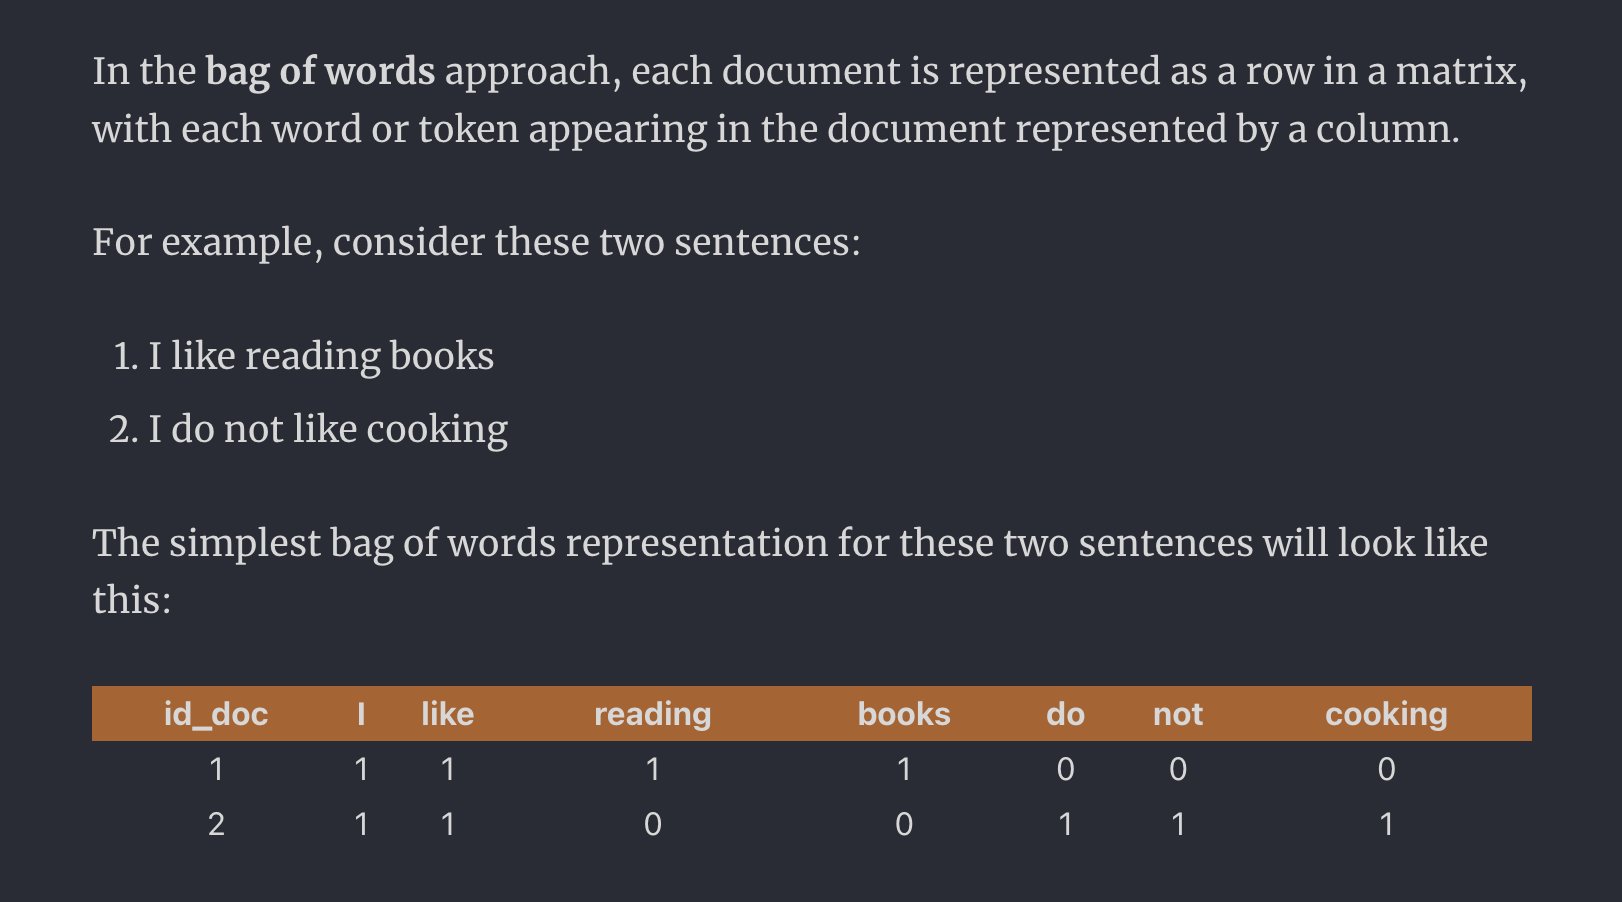

We need to specify a number of N-grams used for this approach. An n-gram is a sequence of n words. (1, 3) means that the function will use sequences of 1, 2, and 3 words to generate the counts.

We also need to specify stop words. Stop_words is a list of words that the function will ignore. Typically this includes words like "a", "the", "is", and "are". In this case, the list "english" means that the function will ignore the most common words in English.

In [ ]:
vec = CountVectorizer(
    ngram_range=(1, 3),
    stop_words="english",
)

X_train = vec.fit_transform(df_train.clean_text)
X_test = vec.transform(df_test.clean_text)

y_train = df_train.target
y_test = df_test.target

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.66      0.77       160
          misc.forsale       0.99      0.87      0.93       195
             sci.space       0.89      0.94      0.91       197
soc.religion.christian       0.71      0.94      0.81       200
    talk.politics.guns       0.92      0.88      0.90       182

              accuracy                           0.87       934
             macro avg       0.89      0.86      0.86       934
          weighted avg       0.88      0.87      0.87       934

